<a href="https://colab.research.google.com/github/Felipe-DelosSantos09/Diplomado-IA/blob/master/Ejemplo_2_MNIST_CNN_diplomado_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:

# Cargar el dataset de MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Normalizar las imágenes
train_images = train_images / 255.0
test_images = test_images / 255.0


In [ ]:
# Convertir las etiquetas a formato one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# Definir la arquitectura del modelo
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation = "relu"),  # Capa densa con 512 neuronas
    Dense(512, activation = "relu"),  # Segunda capa densa con 512 neuronas
    Dense(10, activation='softmax')  # Capa de salida con 10 neuronas (una por cada clase)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_data=(test_images, test_labels))


Epoch 1/20
469/469 [==============================] - 16s 32ms/step - loss: 0.2129 - accuracy: 0.9377 - val_loss: 0.1116 - val_accuracy: 0.9656
Epoch 2/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0781 - accuracy: 0.9757 - val_loss: 0.0778 - val_accuracy: 0.9755
Epoch 3/20
469/469 [==============================] - 11s 23ms/step - loss: 0.0484 - accuracy: 0.9845 - val_loss: 0.0864 - val_accuracy: 0.9731
Epoch 4/20
469/469 [==============================] - 8s 18ms/step - loss: 0.0383 - accuracy: 0.9876 - val_loss: 0.0736 - val_accuracy: 0.9774
Epoch 5/20
469/469 [==============================] - 11s 23ms/step - loss: 0.0244 - accuracy: 0.9922 - val_loss: 0.0784 - val_accuracy: 0.9776
Epoch 6/20
469/469 [==============================] - 11s 23ms/step - loss: 0.0228 - accuracy: 0.9926 - val_loss: 0.0700 - val_accuracy: 0.9807
Epoch 7/20
469/469 [==============================] - 11s 23ms/step - loss: 0.0181 - accuracy: 0.9940 - val_loss: 0.0696 - val_accuracy: 

In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 1s 4ms/step - loss: 0.1146 - accuracy: 0.9802
Test accuracy: 0.9801999926567078


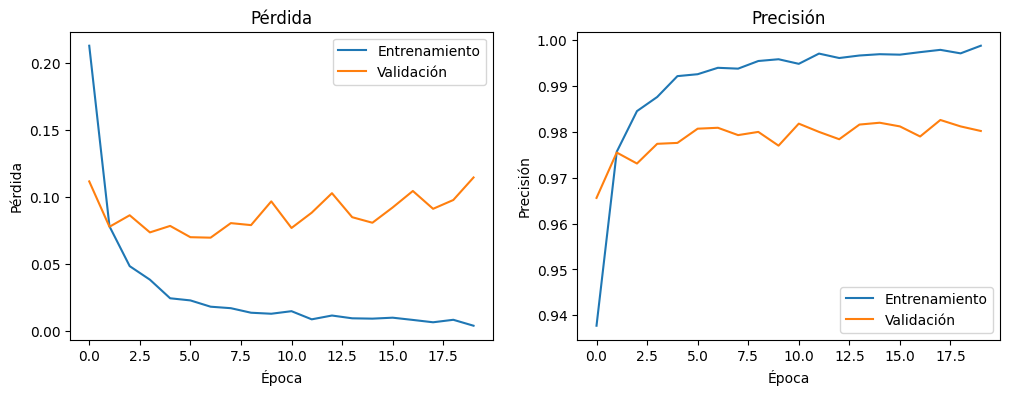

In [ ]:
# Graficar la pérdida y la precisión del entrenamiento y la validación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.show()

# Redimensionar las imágenes para incluir el canal de color

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
# Cargar el dataset de MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Redimensionar las imágenes para incluir el canal de color
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)


In [ ]:
# Normalizar las imágenes
train_images = train_images / 255.0
test_images = test_images / 255.0


In [ ]:
# Convertir las etiquetas a formato one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# Definir la arquitectura del modelo CNN
model = Sequential([
    Conv2D(64, kernel_size = (3,3), activation = "relu", input_shape=(28, 28, 1)),  # Primera capa convolucional
    MaxPooling2D(pool_size=(2,2)),  # Primera capa de pooling
    Flatten(),  # Aplanar las salidas
    Dense(128, activation='relu'),  # Capa densa con 128 neuronas
    Dense(10, activation='softmax')  # Capa de salida con 10 neuronas (una por cada clase)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               1384576   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1386506 (5.29 MB)
Trainable params: 1386506 (5.29 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
# Compilar el modelo
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/20
469/469 [==============================] - 7s 6ms/step - loss: 0.1879 - accuracy: 0.9465 - val_loss: 0.0738 - val_accuracy: 0.9779
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0603 - accuracy: 0.9822 - val_loss: 0.0548 - val_accuracy: 0.9811
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0388 - accuracy: 0.9886 - val_loss: 0.0476 - val_accuracy: 0.9832
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0276 - accuracy: 0.9917 - val_loss: 0.0436 - val_accuracy: 0.9853
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0199 - accuracy: 0.9939 - val_loss: 0.0451 - val_accuracy: 0.9861
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0137 - accuracy: 0.9960 - val_loss: 0.0414 - val_accuracy: 0.9861
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0108 - accuracy: 0.9967 - val_loss: 0.0451 - val_accuracy: 0.9869
Epoch 

In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0577 - accuracy: 0.9875
Test accuracy: 0.987500011920929


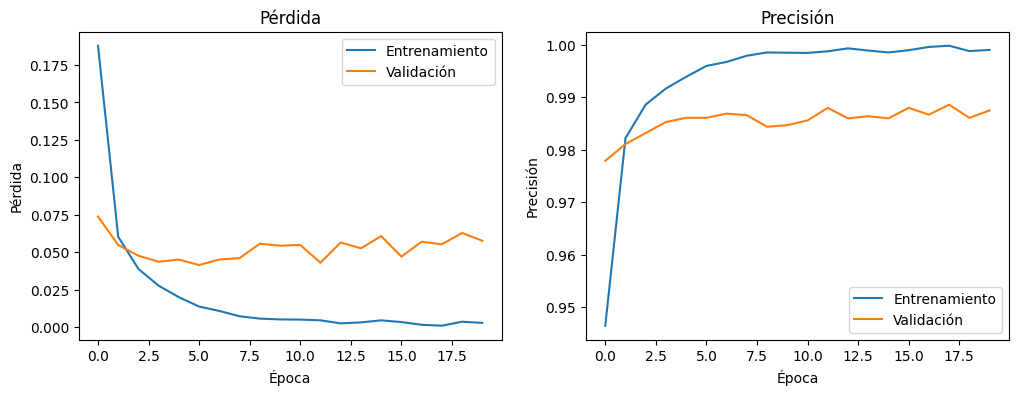

In [ ]:
# Graficar la pérdida y la precisión del entrenamiento y la validación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.show()

# Sugerencia de Alumno:

In [ ]:
# Definir la arquitectura del modelo CNN
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(64, kernel_size = (3,3), activation = "relu", input_shape=(28, 28, 1)),  # Primera capa convolucional
    MaxPooling2D(pool_size=(2,2)),  # Primera capa de pooling
    Dropout(0.25), # Agregar una capa de dropout
    Flatten(),  # Aplanar las salidas
    Dense(128, activation='relu'),  # Capa densa con 128 neuronas
    Dropout(0.25),
    Dense(10, activation='softmax')  # Capa de salida con 10 neuronas (una por cada clase)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 10816)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               1384576   
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                      

In [ ]:
# Compilar el modelo
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/20
469/469 [==============================] - 9s 9ms/step - loss: 0.2394 - accuracy: 0.9286 - val_loss: 0.0759 - val_accuracy: 0.9763
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0867 - accuracy: 0.9735 - val_loss: 0.0498 - val_accuracy: 0.9821
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0623 - accuracy: 0.9812 - val_loss: 0.0425 - val_accuracy: 0.9848
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0487 - accuracy: 0.9850 - val_loss: 0.0368 - val_accuracy: 0.9874
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0398 - accuracy: 0.9879 - val_loss: 0.0402 - val_accuracy: 0.9871
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0333 - accuracy: 0.9897 - val_loss: 0.0330 - val_accuracy: 0.9888
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0289 - accuracy: 0.9905 - val_loss: 0.0326 - val_accuracy: 0.9891
Epoch 

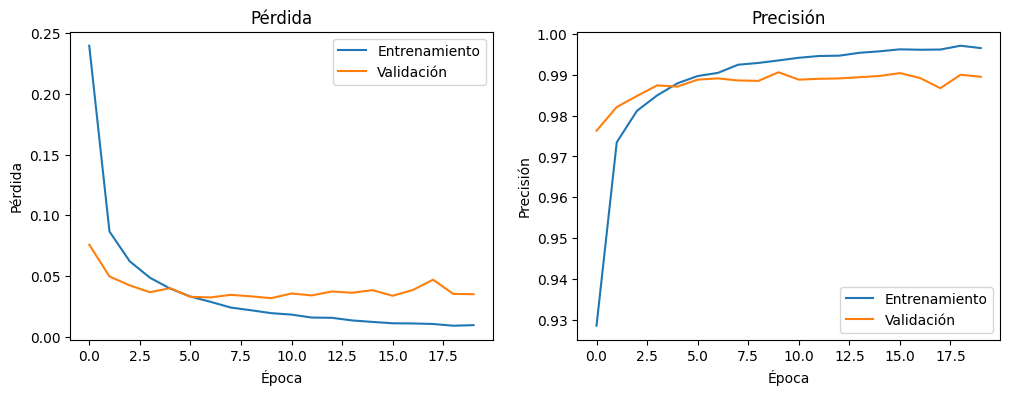

In [ ]:
# Graficar la pérdida y la precisión del entrenamiento y la validación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.show()